In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import matplotlib.animation
import seaborn as sns

In [57]:
df = pd.read_csv('../ModalSplit/MODSPLIT_country_data_with_full_time_period.csv')

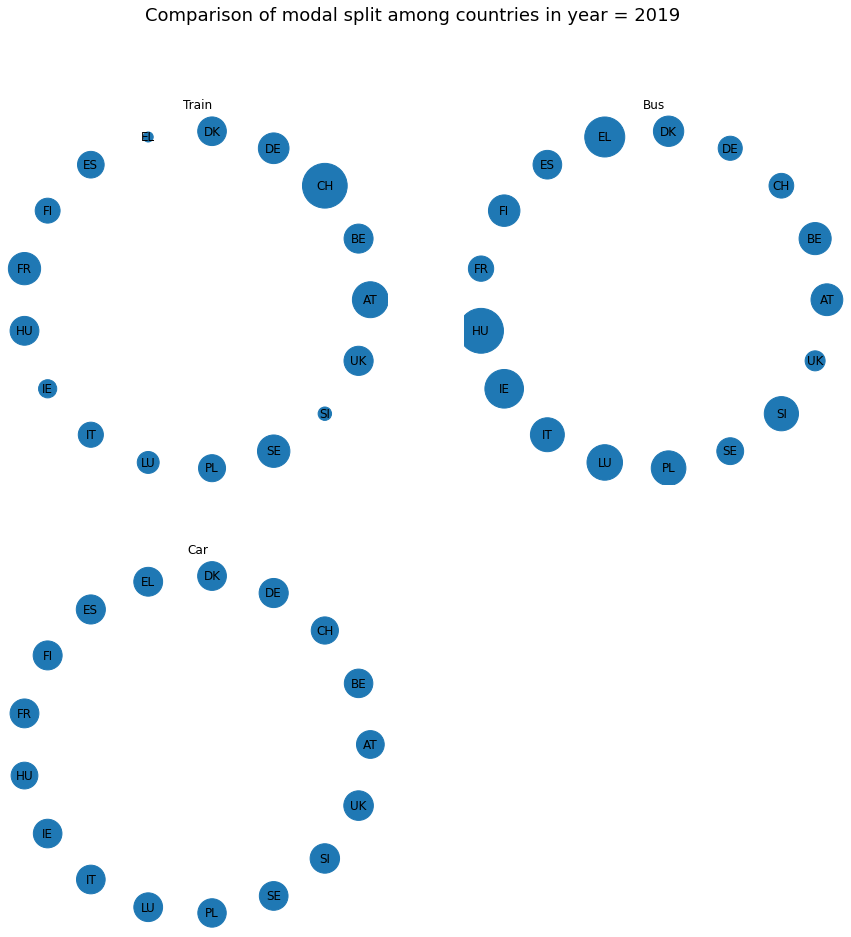

In [84]:
G = nx.Graph()

curr_year = 2019

for index, row in df.iterrows():
    if(row['VehicleType'] == 'BUS_TOT'):
        G.add_node(row["Country"], year = curr_year, BUS_TOT = row[str(curr_year)])
    elif(row['VehicleType'] == 'CAR'):
        G.add_node(row["Country"], year = curr_year, CAR = row[str(curr_year)])
    elif(row['VehicleType'] == 'TRN'):
        G.add_node(row["Country"], year = curr_year, TRN = row[str(curr_year)])
    else:
        G.add_node(row["Country"], year = curr_year, TRN_BUS_TOT_AVD = row[str(curr_year)])

a = list(v * 100 for v in nx.get_node_attributes(G,'TRN').values())
b = list(v * 100 for v in nx.get_node_attributes(G,'BUS_TOT').values())
c = list(v * 10 for v in nx.get_node_attributes(G,'CAR').values())
 
nodes = list(nx.get_node_attributes(G,'BUS_TOT').keys())

f, axes = plt.subplots(2, 2,figsize=(15, 15))
axs = axes.ravel()
axs[0].set_title("Train")
nx.draw_circular(G, nodelist = nodes, node_size = a, with_labels = True, ax = axs[0])
axs[1].set_title("Bus")
nx.draw_circular(G, nodelist = nodes, node_size = b, with_labels = True, ax = axs[1])
axs[2].set_title("Car")
nx.draw_circular(G, nodelist = nodes, node_size = c, with_labels = True, ax = axs[2])

f.delaxes(axs[3])
f.suptitle("Comparison of modal split among countries in year = 2019", fontsize = 18)
plt.show()

### Most correlated countries in Europe based on bus transport

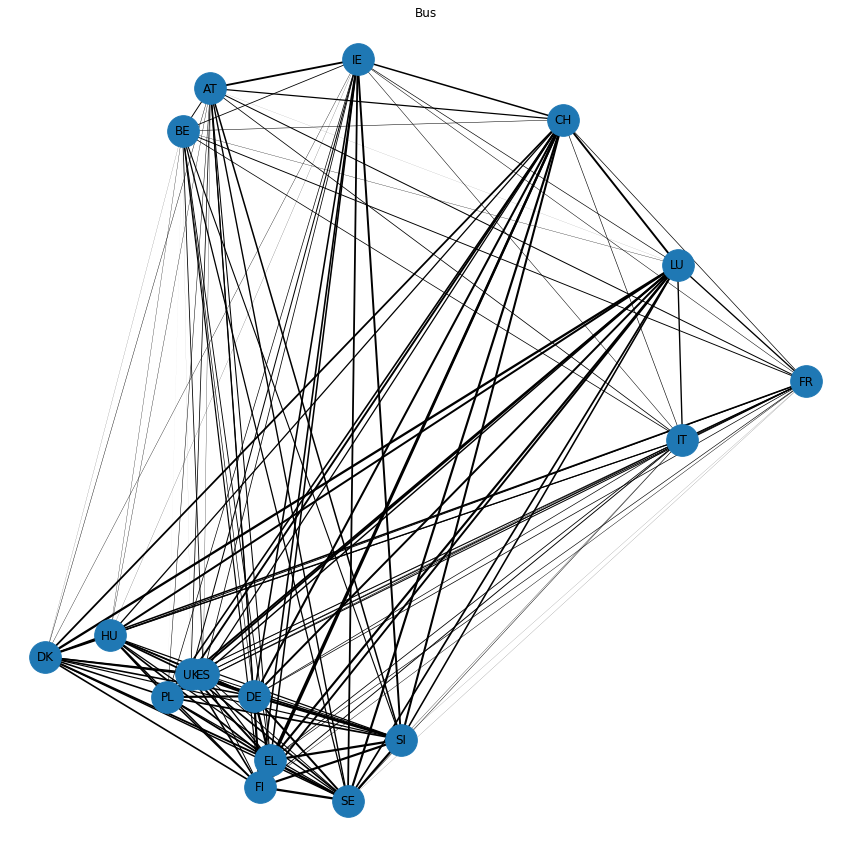

In [164]:
df_bus = df[df["VehicleType"] == "BUS_TOT"][["Country", "2019", '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
df_bus = df_bus.set_index('Country').T.corr()

G = nx.Graph()

for country in df_bus.index:
    G.add_node(country)
    
for i in range(1, df_bus.shape[0]):
    for j in range(i):
        G.add_edge(df_bus.index[j], df_bus.columns[i], value = df_bus.iloc[i, j])

edges = G.edges()
weights = [2.5 * G[u][v]['value'] for u, v in edges]        

f, axes = plt.subplots(figsize=(15, 15))
axes.set_title("Bus")
pos = nx.spring_layout(G, weight = 'value')
nx.draw(G, pos=pos, nodelist = nodes, node_size = 1000, with_labels = True, width = weights, ax = axes)

### Most correlated countries in Europe based on car transport

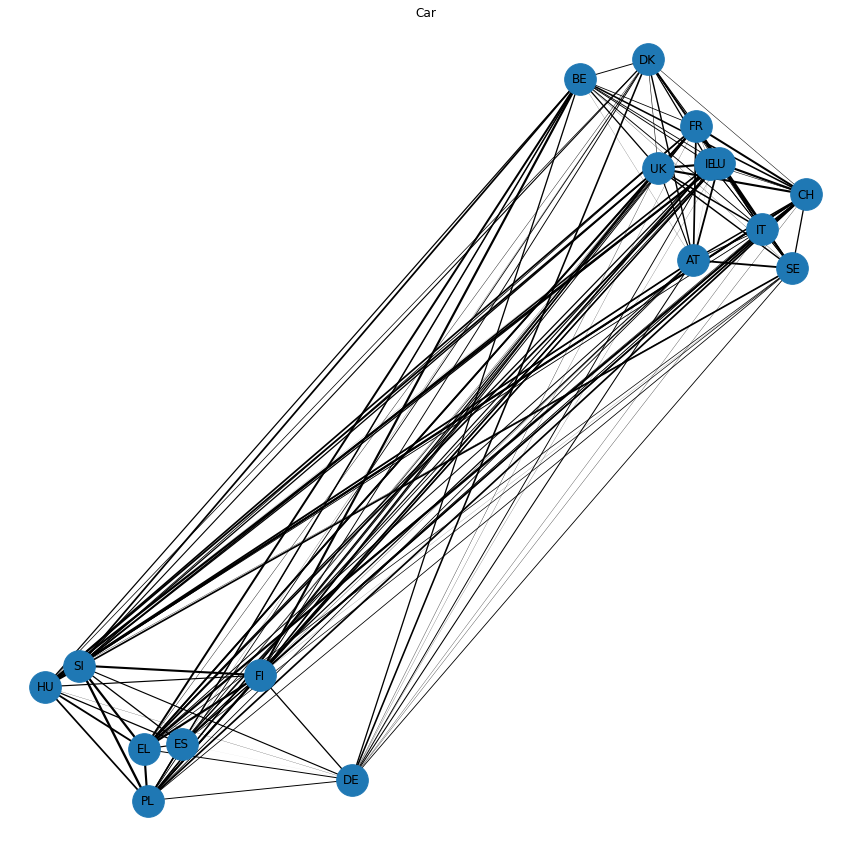

In [165]:
df_car = df[df["VehicleType"] == "CAR"][["Country", "2019", '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
df_car = df_car.set_index('Country').T.corr()

G = nx.Graph()

for country in df_car.index:
    G.add_node(country)
    
for i in range(1, df_car.shape[0]):
    for j in range(i):
        G.add_edge(df_car.index[j], df_car.columns[i], value = df_car.iloc[i, j])

edges = G.edges()
weights = [2.5 * G[u][v]['value'] for u, v in edges]        

f, axes = plt.subplots(figsize=(15, 15))
axes.set_title("Car")
pos = nx.spring_layout(G, weight='value')
nx.draw(G, pos=pos, nodelist = nodes, node_size = 1000, with_labels = True, width = weights, ax = axes)

### Most correlated countries in Europe based on train transport

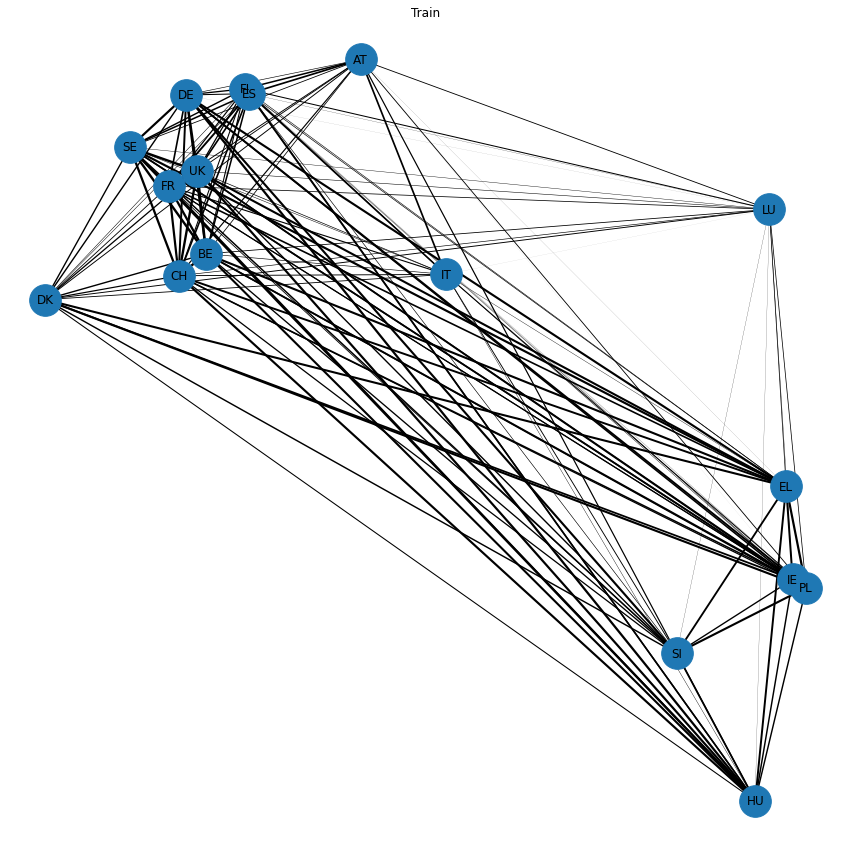

In [166]:
df_train = df[df["VehicleType"] == "TRN"][["Country", "2019", '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
df_train = df_train.set_index('Country').T.corr()

G = nx.Graph()

for country in df_train.index:
    G.add_node(country)
    
for i in range(1, df_train.shape[0]):
    for j in range(i):
        G.add_edge(df_train.index[j], df_train.columns[i], value = df_train.iloc[i, j])

edges = G.edges()
weights = [2.5 * G[u][v]['value'] for u, v in edges]        

f, axes = plt.subplots(figsize=(15, 15))
axes.set_title("Train")
pos = nx.spring_layout(G, weight='value')
nx.draw(G, pos=pos, nodelist = nodes, node_size = 1000, with_labels = True, width = weights, ax = axes)

# Correlations between ModalSplit and different types of transportation

In [52]:
df = pd.read_csv("../RelatedToTransport/All_data_inner_join_by_country_and_year.csv")
df = df.drop(df[df["ModalSplit_VehicleType"] == 'TRN_BUS_TOT_AVD'].index)
one_hot = pd.get_dummies(df["ModalSplit_VehicleType"])
df.drop('ModalSplit_VehicleType', axis = 1, inplace=True)
df = df.join(one_hot)

### Bus transportation

<AxesSubplot:>

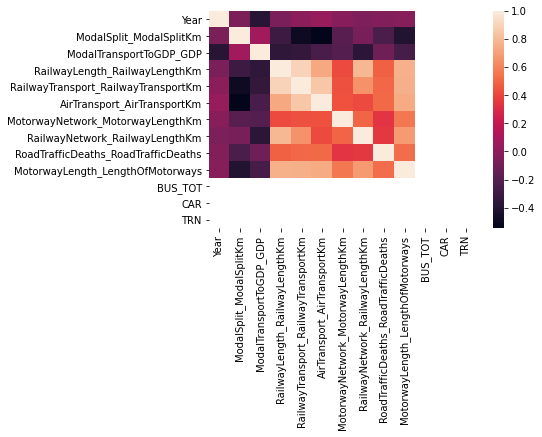

In [15]:
sns.heatmap(df[(df["RoadTrafficDeaths_TypeOfRoad"] == 'MWAY') & (df["BUS_TOT"] == 1)].corr())

### Car transportation

<AxesSubplot:>

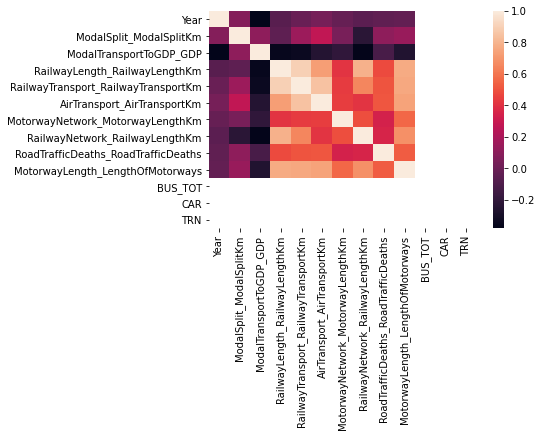

In [16]:
sns.heatmap(df[(df["RoadTrafficDeaths_TypeOfRoad"] == 'MWAY') & (df["CAR"] == 1)].corr())

### Train transportation

<AxesSubplot:>

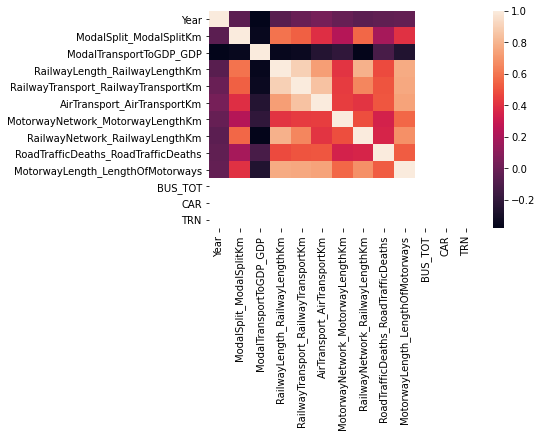

In [17]:
sns.heatmap(df[(df["RoadTrafficDeaths_TypeOfRoad"] == 'MWAY') & (df["TRN"] == 1)].corr())

# Random forest for ModalSplit target variable

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

df_rf = df

for col in ['MotorwayNetwork_Unit', 'RoadTrafficDeaths_Unit', 'MotorwayLength_TypeOfRoad']:
    one_hot = pd.get_dummies(df_rf[col])
    df_rf.drop(col, axis = 1, inplace=True)
    df_rf = df_rf.join(one_hot)

bus_df = df_rf[(df_rf["RoadTrafficDeaths_TypeOfRoad"] == 'MWAY') & (df_rf["BUS_TOT"] == 1)]
car_df = df_rf[(df_rf["RoadTrafficDeaths_TypeOfRoad"] == 'MWAY') & (df_rf["CAR"] == 1)]
train_df = df_rf[(df_rf["RoadTrafficDeaths_TypeOfRoad"] == 'MWAY') & (df_rf["TRN"] == 1)]

### Bus transportation

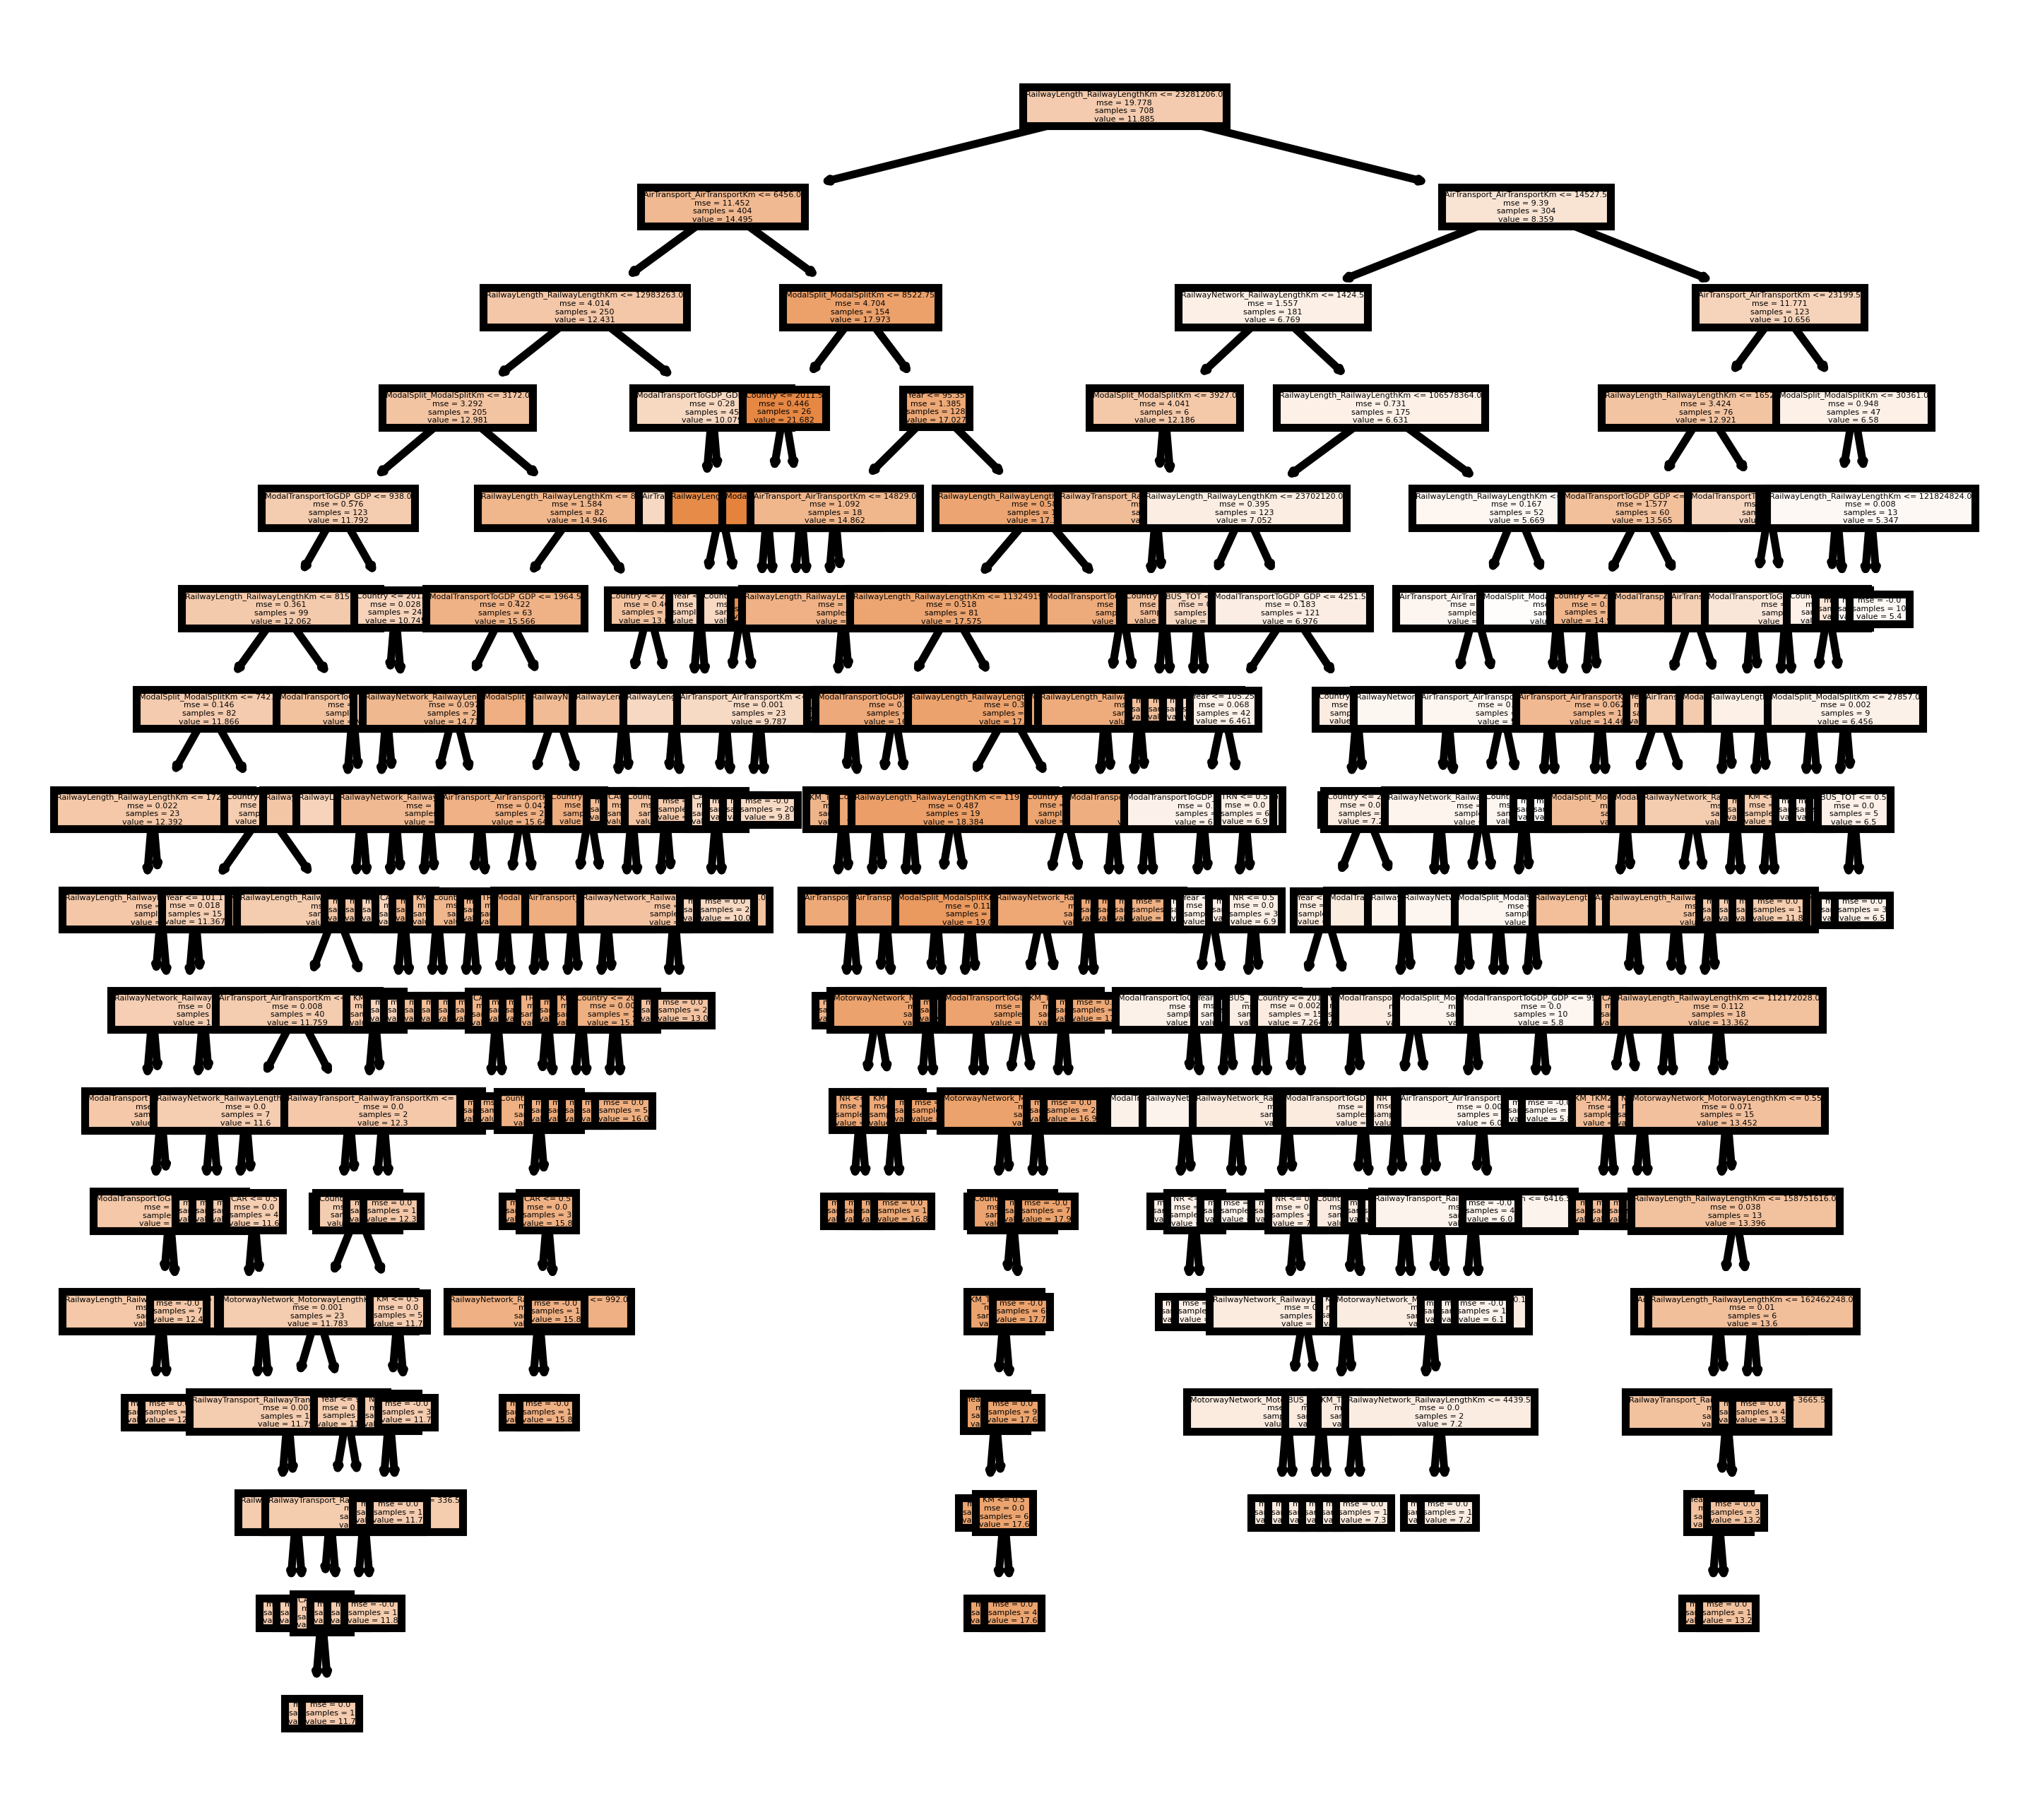

In [54]:
X = bus_df.drop(['Country', 'ModalSplit_ModalSplitKm', 'RoadTrafficDeaths_TypeOfRoad'], axis = 1)
y = bus_df["ModalSplit_ModalSplitKm"]

regr = RandomForestRegressor()
regr.fit(X, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(regr.estimators_[0],
               feature_names  = bus_df.columns,
               filled = True);
fig.savefig('bus_rf_individualtree.png')

### Car transportation

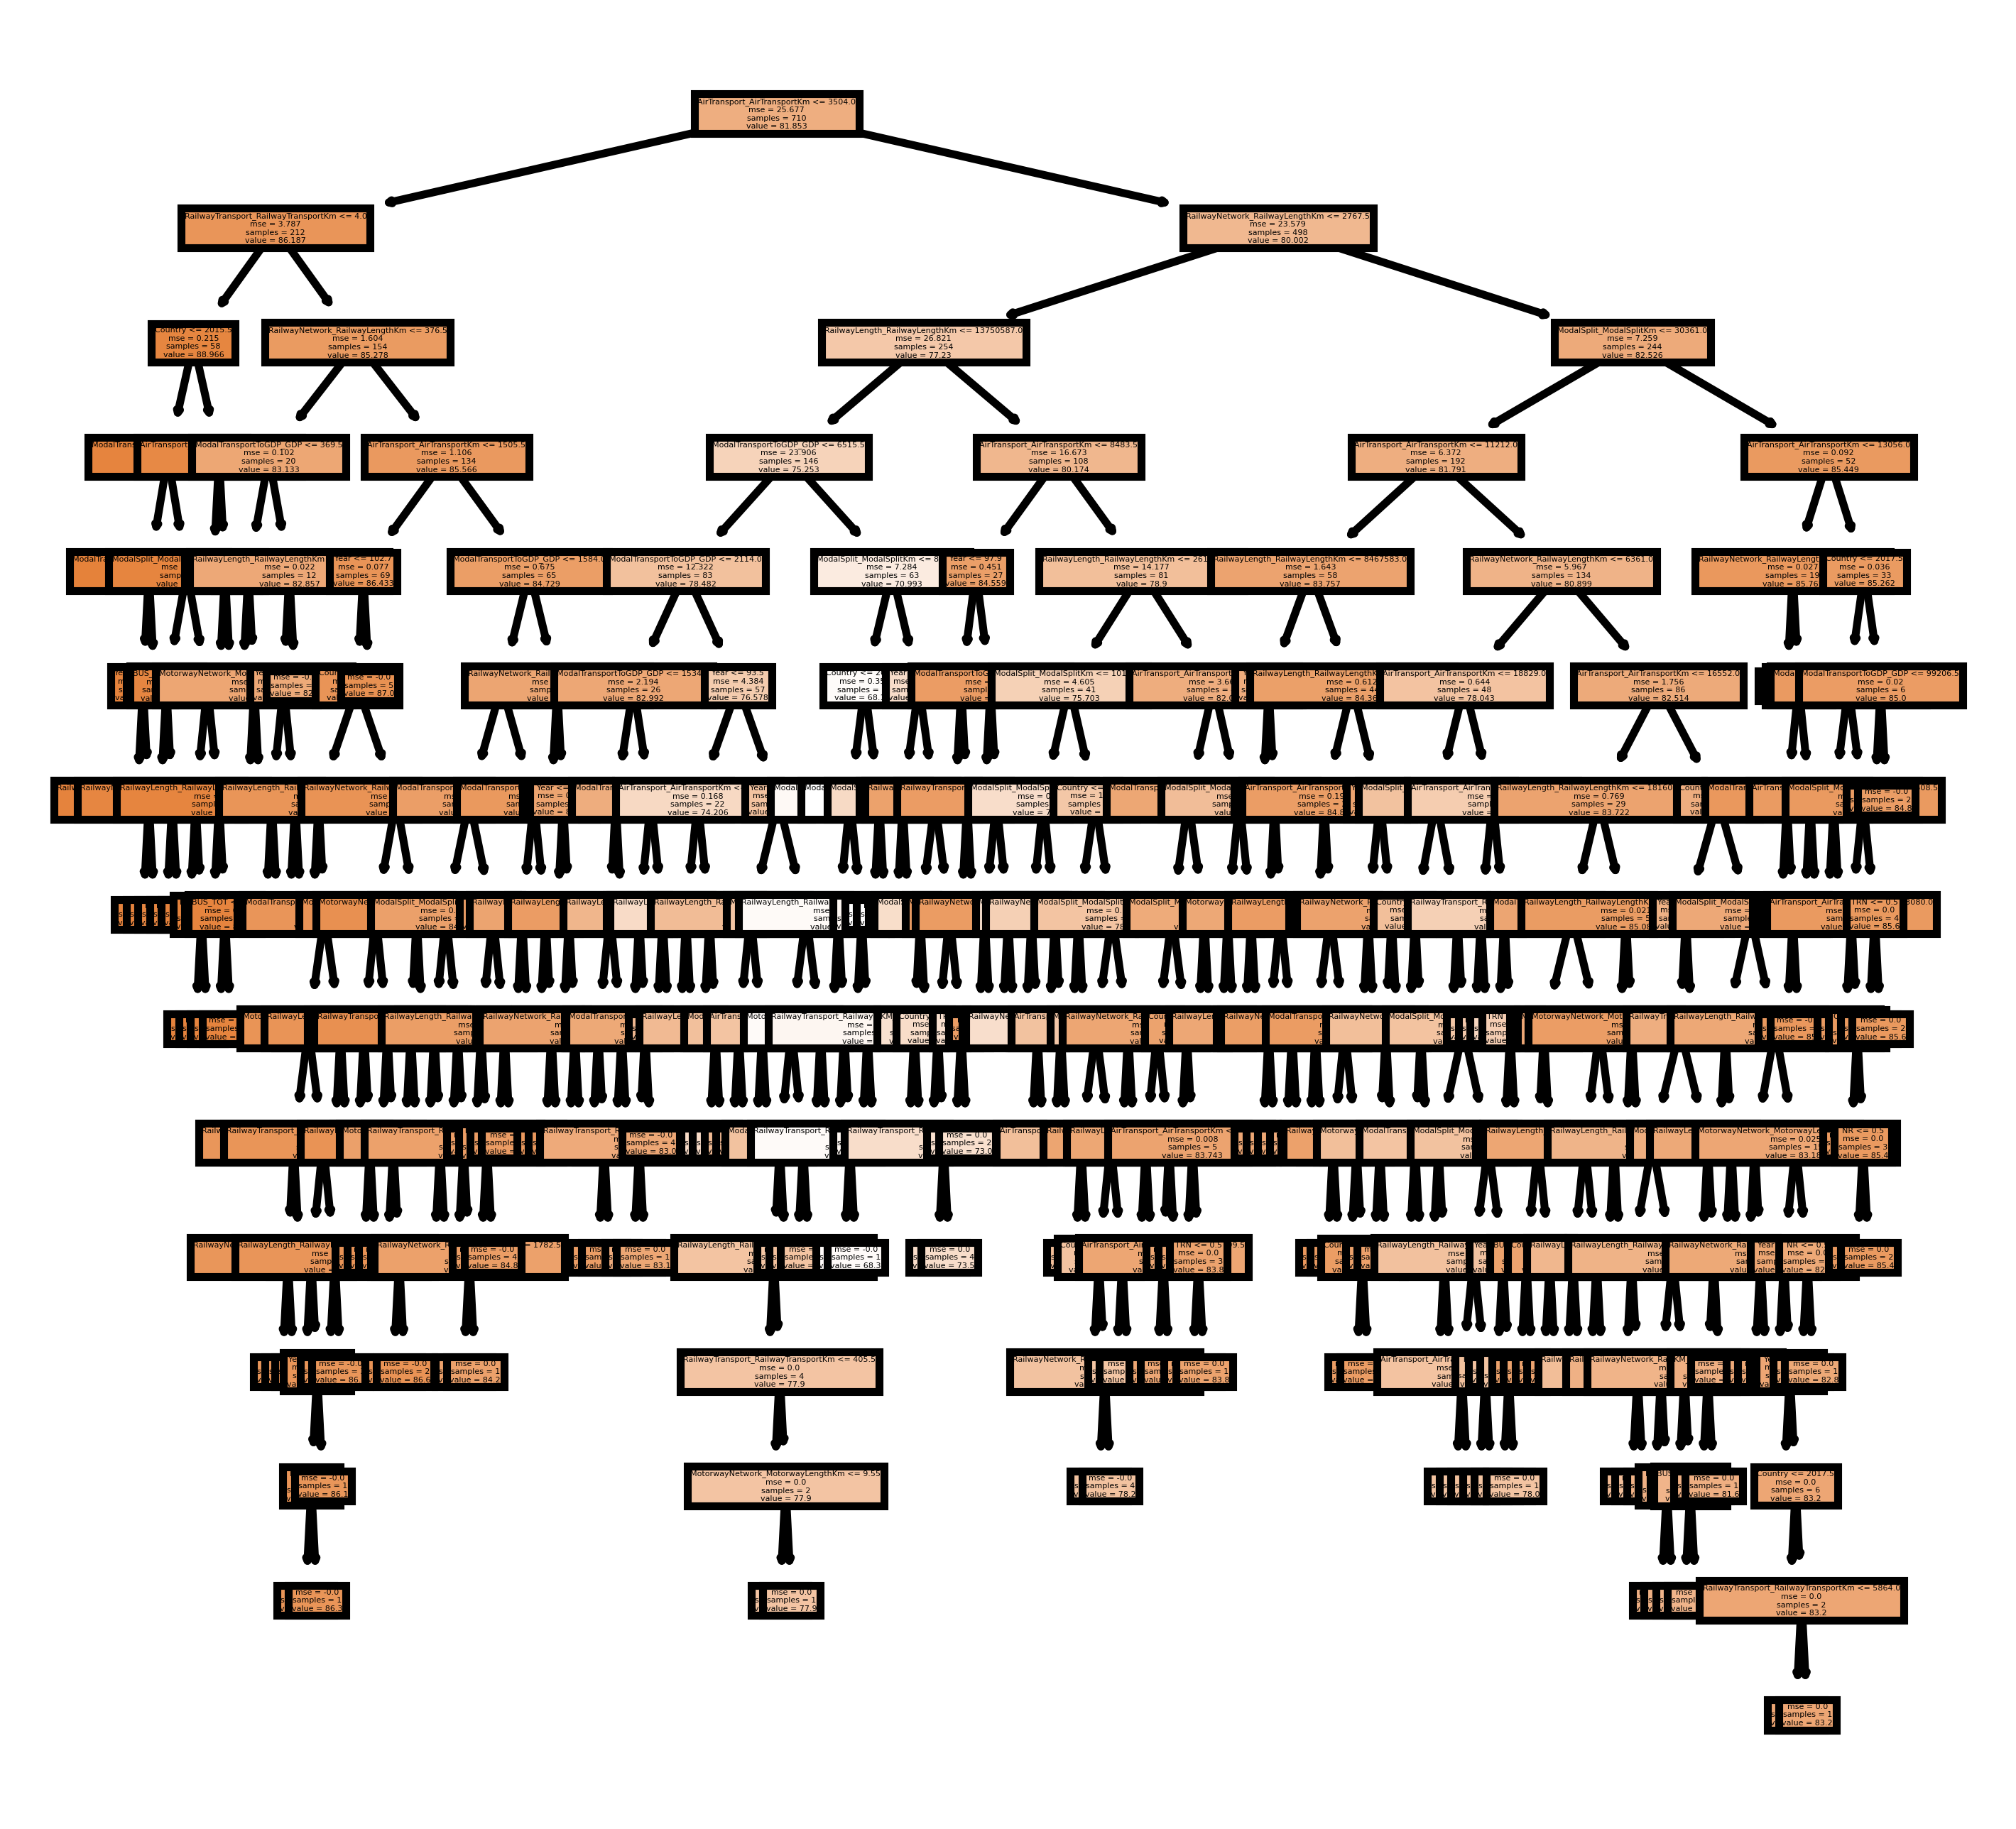

In [55]:
X = car_df.drop(['Country', 'ModalSplit_ModalSplitKm', 'RoadTrafficDeaths_TypeOfRoad'], axis = 1)
y = car_df["ModalSplit_ModalSplitKm"]

regr = RandomForestRegressor()
regr.fit(X, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(regr.estimators_[0],
               feature_names  = car_df.columns,
               filled = True);
fig.savefig('car_rf_individualtree.png')

### Train transportation

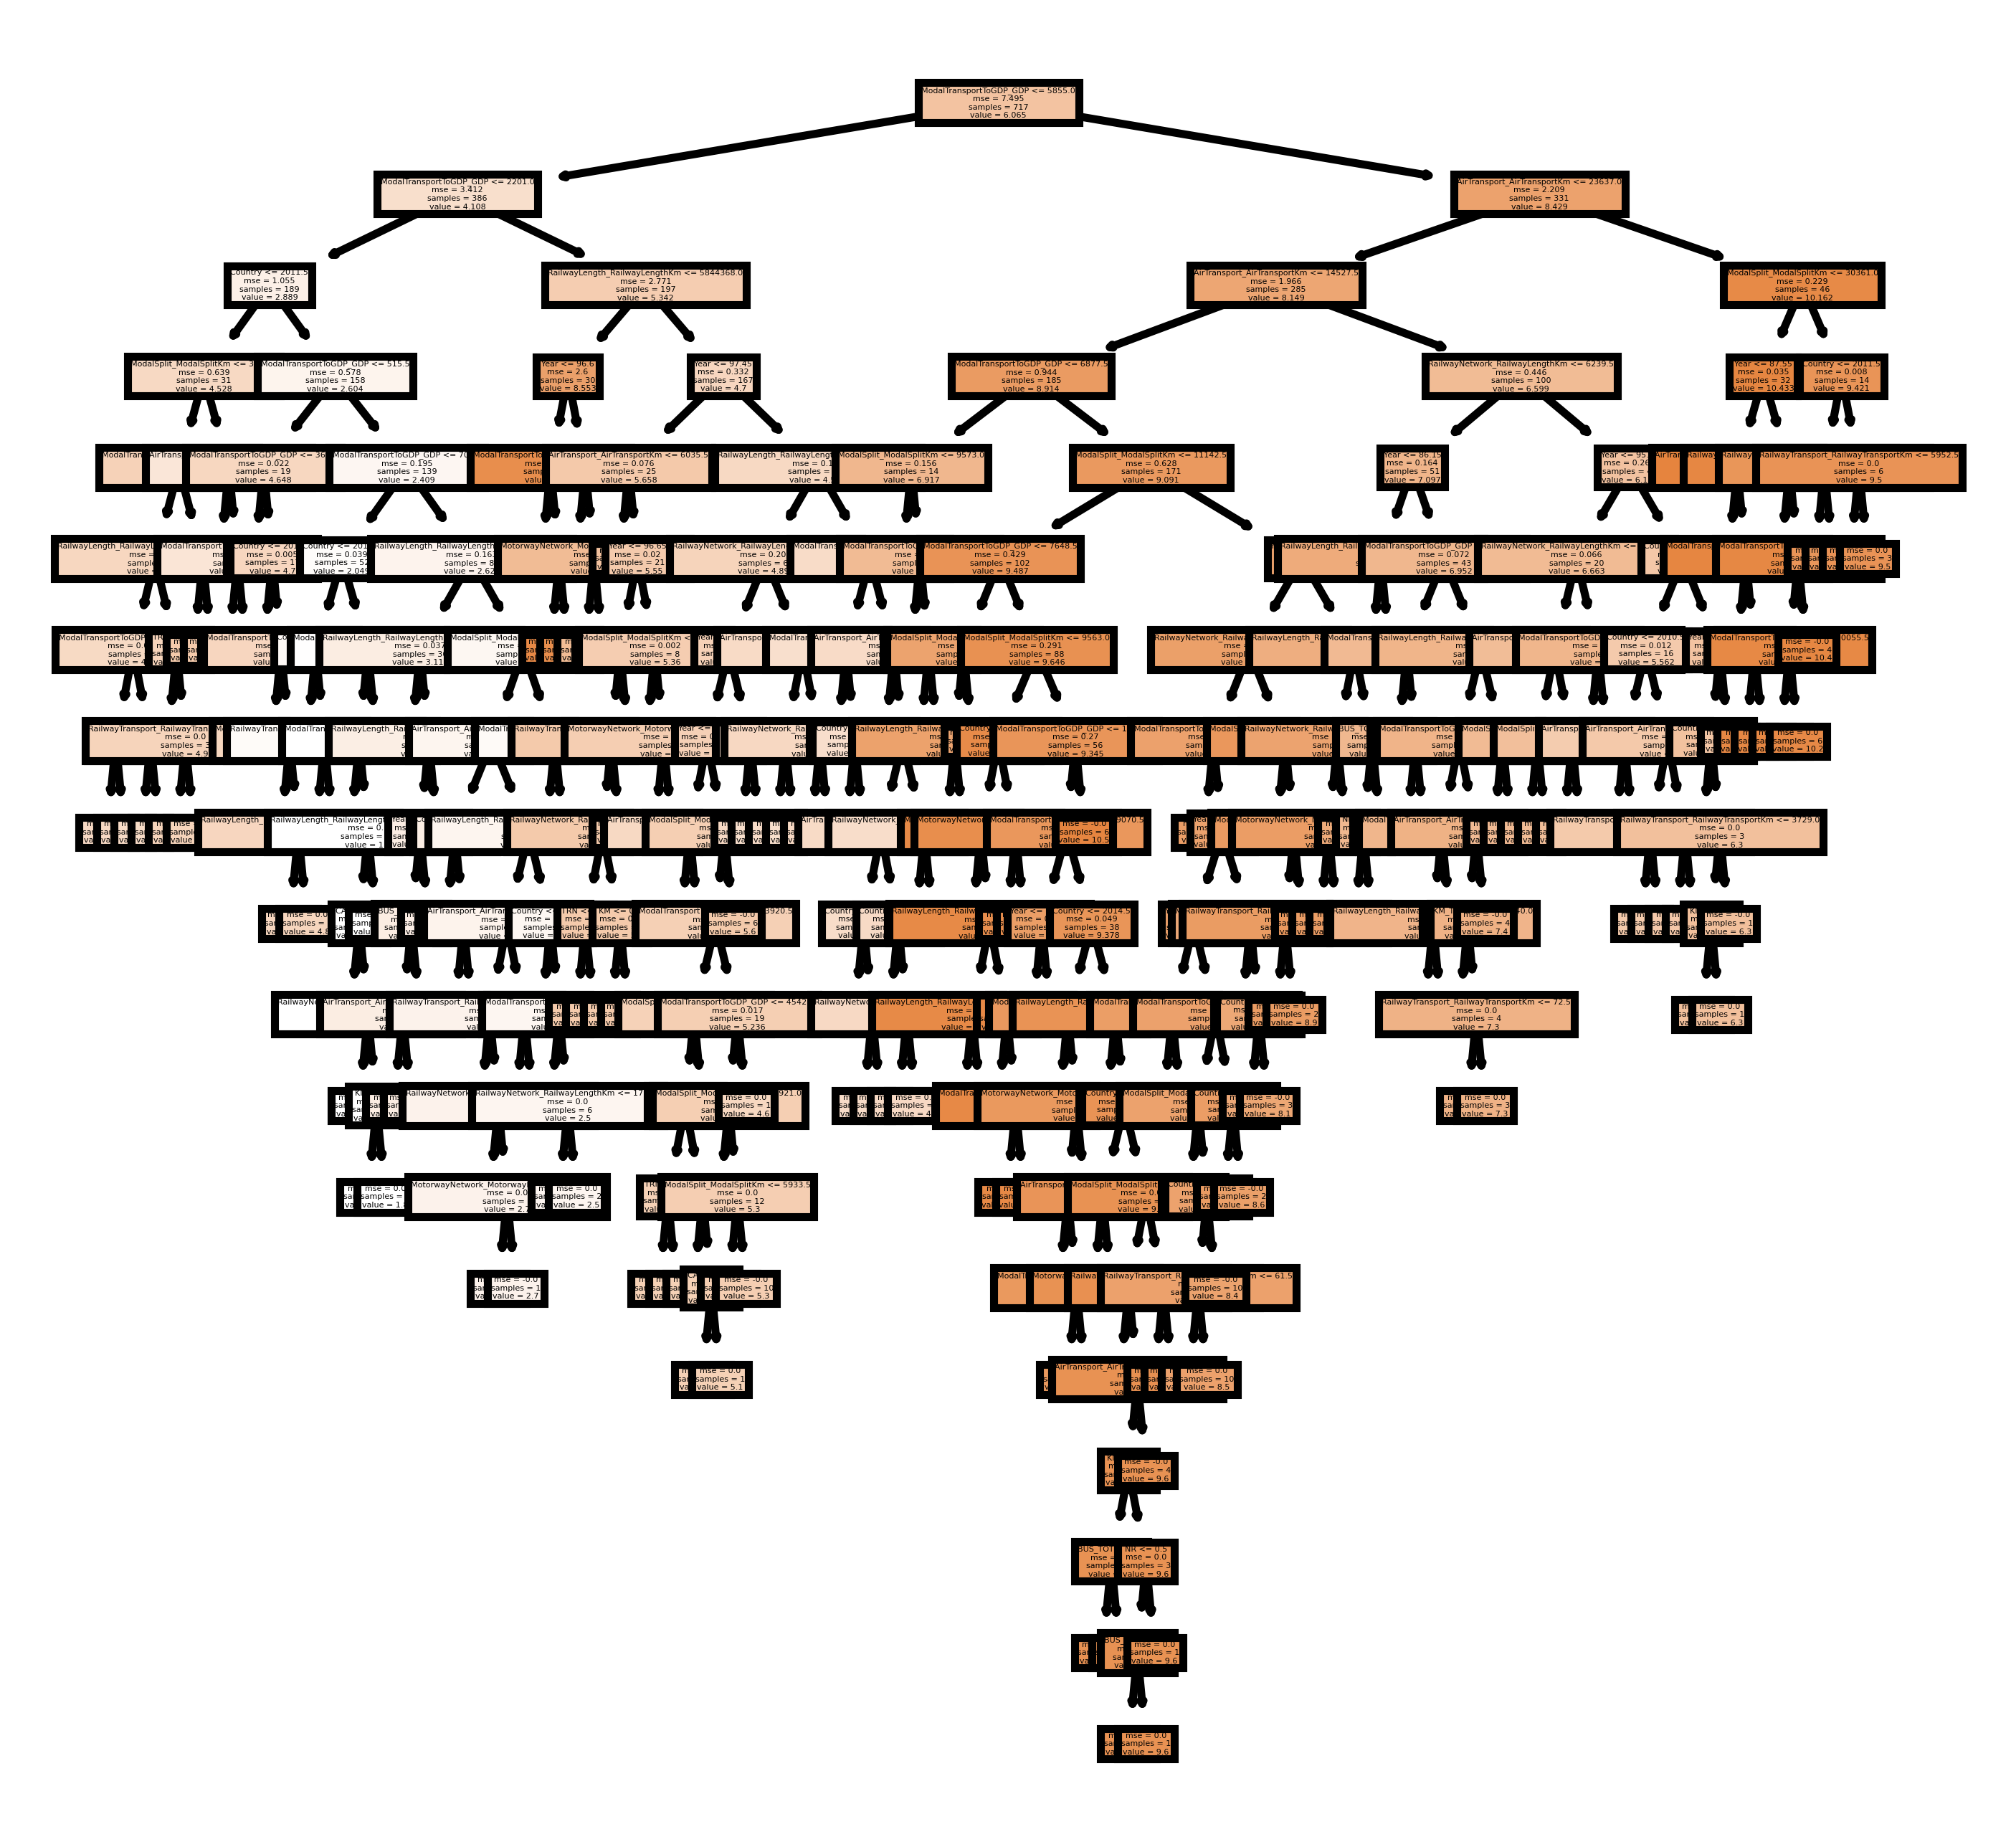

In [56]:
X = train_df.drop(['Country', 'ModalSplit_ModalSplitKm', 'RoadTrafficDeaths_TypeOfRoad'], axis = 1)
y = train_df["ModalSplit_ModalSplitKm"]

regr = RandomForestRegressor()
regr.fit(X, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(regr.estimators_[0],
               feature_names  = train_df.columns,
               filled = True);
fig.savefig('train_rf_individualtree.png')